In [1]:
import pandas as pd
import json
import os
from pandas import json_normalize
from typing import Tuple

json_file = "/Users/juliusmiers/KidneyExchangeOptimization/hyperparameter_tuning/results.json"
with open(json_file, "r") as file:
    data = json.load(file)

df = json_normalize(data, sep='_')
file_path =  os.path.dirname(json_file)
csv_file = os.path.join(file_path, 'results.csv')
df.to_csv(csv_file, index=False)

In [2]:
df_sorted = df.sort_values(by=['MaxCycleLength', 'MaxChainLength', 'TimeTaken'], ascending=[False, False, True])
group_count = df_sorted.groupby(['MaxCycleLength', 'MaxChainLength']).size().reset_index(name='count')
df_sorted = df_sorted.merge(group_count, on=['MaxCycleLength', 'MaxChainLength'], how='left')
df_sorted = df_sorted[['Instance', 'MaxCycleLength', 'MaxChainLength', 'TimeTaken', 'Status', 'count']]
df_sorted['optimal_percentage'] = df_sorted.apply(
    lambda row: (df_sorted[
        (df_sorted['MaxCycleLength'] == row['MaxCycleLength']) & 
        (df_sorted['MaxChainLength'] == row['MaxChainLength']) &
        (df_sorted['TimeTaken'] <= row['TimeTaken']) &
        (df_sorted['Status'] == 'Optimal')
    ].shape[0] / row['count']) * 100, axis=1
)


/var/folders/k_/cffxxp4n0_dbf6_t9xw987wm0000gn/T/ipykernel_53630/2488201640.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


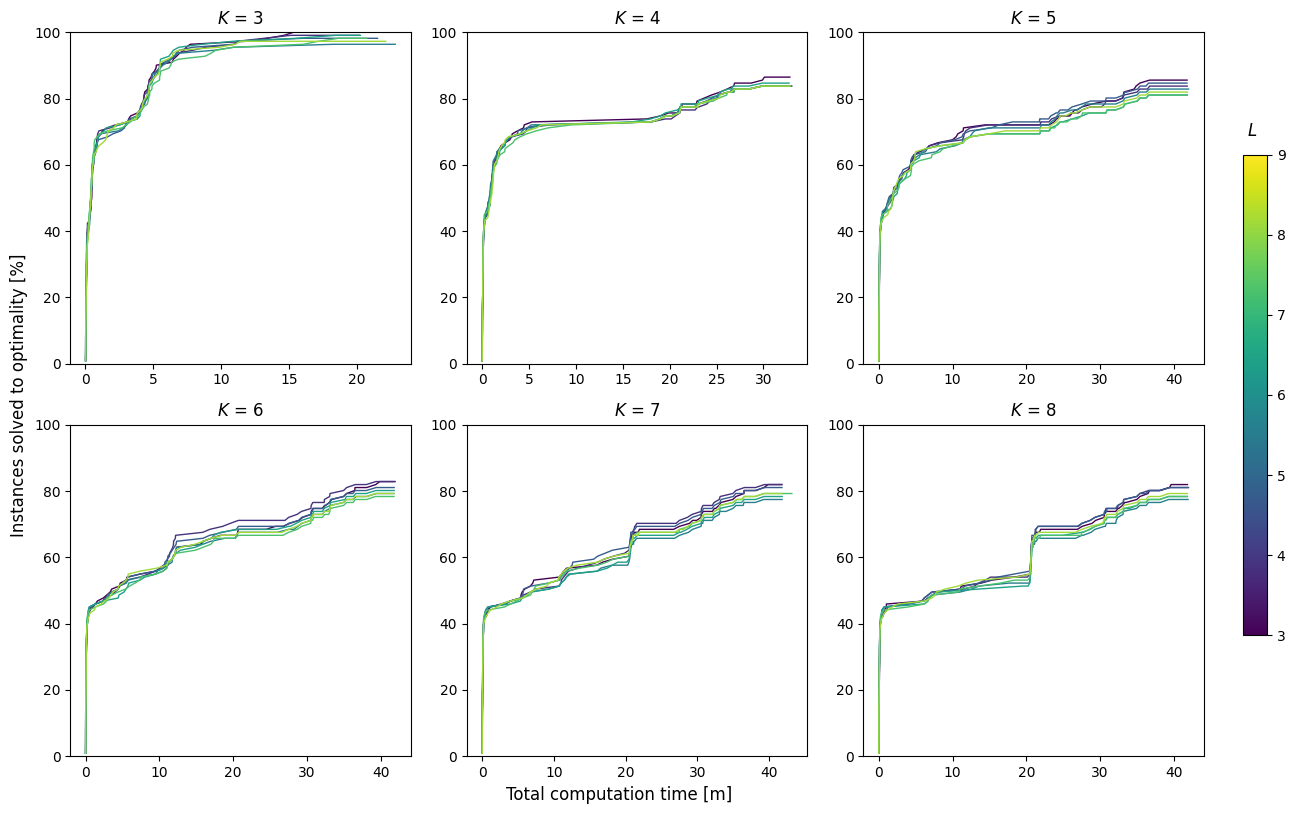

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

k_values = list(range(3,10))  
l_values = list(range(3,10)) 
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=3, vmax=9) 

for i, ax in enumerate(axs.flat): 
    k = k_values[i] 
    for j, l in enumerate(l_values):
        group = df_sorted.loc[(df_sorted['MaxCycleLength'] == k) &
                              (df_sorted['MaxChainLength'] == l)]
        ax.plot(group['TimeTaken'], group['optimal_percentage'], color=cmap(j / len(l_values)), linewidth=1)

    ax.set_title(f'{r'$K$'} = {k}')
    ax.set_ylim(0, 100)

fig.text(0.5, 0.0, 'Total computation time [m]', ha='center', va='center', fontsize=12)
fig.text(0.0, 0.5, 'Instances solved to optimality [%]', ha='center', va='center', rotation='vertical', fontsize=12)

#color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.05, pad=0.04)
fig.text(1.028, 0.83,  r'$L$', ha='center', va='center', fontsize=12)
cbar.ax.set_position([1.02, 0.1, 0.02, 0.8])
plt.tight_layout()
plt.show()

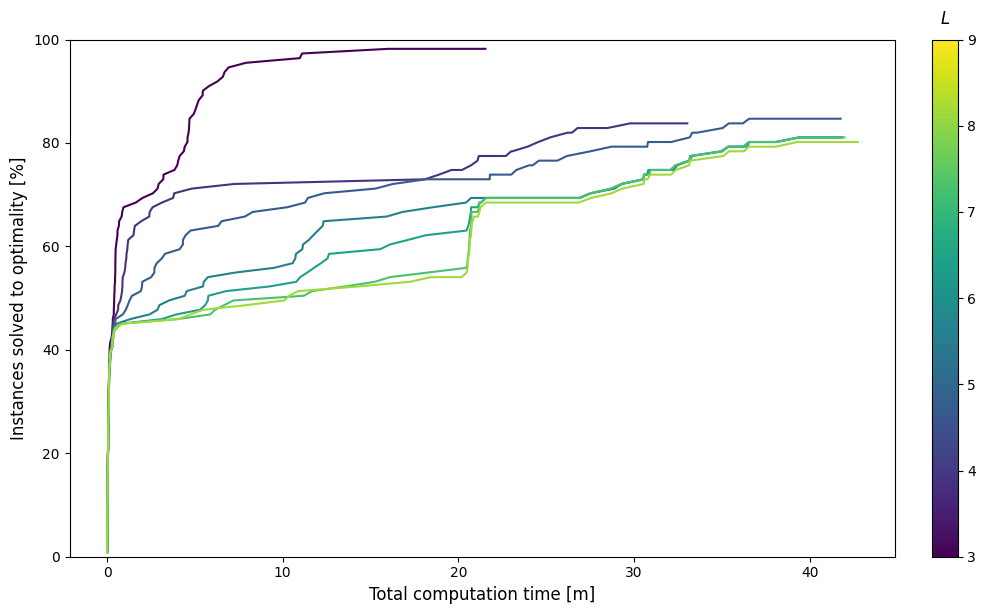

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

k_values = list(range(3, 10))
l_values = list(range(3, 10))
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=3, vmax=9)

fig, ax = plt.subplots(figsize=(10, 6))

for i, k in enumerate(k_values):
    group = df_sorted.loc[(df_sorted['MaxCycleLength'] == k) &
                            (df_sorted['MaxChainLength'] == 5)]
    ax.plot(group['TimeTaken'], group['optimal_percentage'], color=cmap(i / len(k_values)))

ax.set_xlabel('Total computation time [m]', fontsize=12)
ax.set_ylabel('Instances solved to optimality [%]', fontsize=12)
ax.set_ylim(0, 100)

# Color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
fig.text(0.95, 1,  r'$L$', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()
